<a href="https://colab.research.google.com/github/rajathAgalkote/BBCnews_TopicModeling_UnsupervisedML/blob/main/Rajathadri_TopicModeling_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - BBC News Topic Modeling



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajathadri A S

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

Importing all the neccessary libraries and packages that we require to develop the required model.

In [26]:
# Import Libraries

# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

We will require stopwords library.
Hence, let us download it.

In [27]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

For the process of Lemmatization, we will use wordNetLemmatizer.


In [28]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Dataset Loading

In [2]:
# Load Dataset

# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

Hence, the dataframe will contain the textual data along with its cateegory as two features.

In [3]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/AlmaBetter/Project_Unsupervised'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

### Dataset First View

In [4]:
# Dataset First Look

bbc.head()

,Filename,Contents,Category
0,011,ask jeeves tips online ad revival ask jeeves ...,business
1,013,peugeot deal boosts mitsubishi struggling jap...,business
2,015,air passengers win new eu rights air passenge...,business
3,010,court rejects $280bn tobacco case a us govern...,business
4,005,pernod takeover talk lifts domecq shares in u...,business


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bbc.shape

(2224, 3)

### Dataset Information

In [6]:
# Dataset Info
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2224 non-null   object
 1   Contents  2224 non-null   object
 2   Category  2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
250,253,jobs growth still slow in the us the us creat...,business
281,240,economy 'strong' in election year uk business...,business
295,333,troubled marsh under sec scrutiny the us stoc...,business
345,356,s korea spending boost to economy south korea...,business
354,371,singapore growth at 8.1% in 2004 singapore's ...,business
...,...,...,...
2199,323,blind student 'hears in colour' a blind stude...,tech
2201,374,commodore finds new lease of life the once-fa...,tech
2212,387,progress on new internet domains by early 200...,tech
2216,382,tough rules for ringtone sellers firms that f...,tech


99 duplicate entries are present

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(bbc.isnull().sum())

Filename    0
Contents    0
Category    0
dtype: int64


<Axes: >

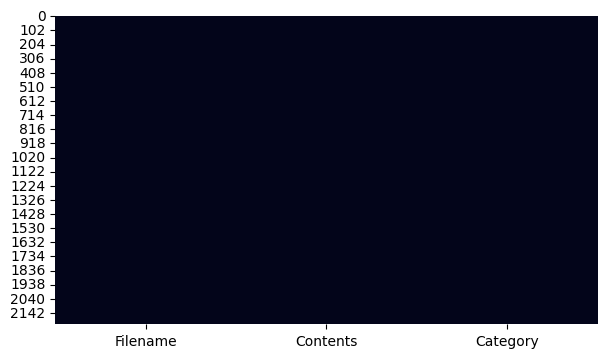

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(7,4))
sns.heatmap(bbc.isnull(), cbar=False)

No missing values are present in the 'bbc' dataset.

### What did you know about your dataset?

Our dataset in this case wasn't collective, it was stored in the form of numerous text files sub-categorized in 5 different domains.

We gathered all the textual data files into a dataframe called 'bbc' and performed some basic operations to understand our dataset.

There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such cases, we have neglected the file altogether using **try and except**, since the case was relevant to only a single file.



*   We observed that our BBC dataframe contains 2224 entries and 3 features.
*   All the features are object datatypes. Although, Filename and Category features should be numerical and categorical-numerical respectively.
* There are 99 duplicate rows. It informs us that these articles are present more than once, we need to drop such rows before we proceed further with the model development. 
* Finally, there are no missing values in our dataset.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bbc.columns

Index(['Filename', 'Contents', 'Category'], dtype='object')

In [ ]:
# Dataset Describe
bbc.describe().T

,count,unique,top,freq
Filename,2224,511,011,5
Contents,2224,2125,digital guru floats sub-$100 pc nicholas negr...,2
Category,2224,5,business,510


Since majority of our data is textual, describe() function is not of much value here due to the lack of numerical information to observe.

### Variables Description 

**The dataset consists of the following attributes:**

● **Index**: Entry index.

● **FileName**: Destination File name/number.

● **Contents**: Complete transcript of the articles, this contains all the textual data present in the destination file for a particular entry.

● **Category**: Theme/domain of the article.

### Check Unique Values for each variable.

In [8]:
# Check Unique Values for each variable.
for i in bbc.columns.tolist():
  print("Unique values in ",i,": ",bbc[i].nunique())

Unique values in  Filename :  511
Unique values in  Contents :  2125
Unique values in  Category :  5


This information was already imparted using the describe() function.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

We will begin data wrangling by dropping the 99 duplicate entries.

In [9]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')

In [10]:
bbc

,Filename,Contents,Category
0,011,ask jeeves tips online ad revival ask jeeves ...,business
1,013,peugeot deal boosts mitsubishi struggling jap...,business
2,015,air passengers win new eu rights air passenge...,business
3,010,court rejects $280bn tobacco case a us govern...,business
4,005,pernod takeover talk lifts domecq shares in u...,business
...,...,...,...
2218,396,new consoles promise big problems making game...,tech
2219,400,us cyber security chief resigns the man makin...,tech
2221,341,sony psp tipped as a 'must-have' sony's plays...,tech
2222,345,more movies head to sony's psp movies open wa...,tech


The Filename feature is an object datatype, but it contains numbers. Hence, we will coonvert it to int64 datatype using pandas to_numeric feature.

In [11]:
# Converting 'Filename' feature to numeric
bbc[['Filename']] = bbc[['Filename']].apply(pd.to_numeric)

In [12]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2125 non-null   int64 
 1   Contents  2125 non-null   object
 2   Category  2125 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.4+ KB


We will remove unwanted characters and punctuations from out 'Contents' feature.

In [33]:
lm = WordNetLemmatizer()

In [34]:
def rem_unwanted(article):
    modify = re.sub("[^a-zA-Z]",' ',article) #Keeping only alphabets in our corpus
    modify = modify.lower()                  #Coonverting into lower case
    modify= ' '.join([lm.lemmatize(word) for word in modify.split() if word not in stopwords.words("english")])
    text_blob_object = TextBlob(modify)

#   choosing only the noun phrases from our corpus
    b = text_blob_object.noun_phrases
    return ' '.join(b)

In [37]:
bbc['Contents'] = bbc['Contents'].apply(rem_unwanted)

In [38]:
bbc['Contents']

0       jeeves tip online online search firm week revi...
1       japanese car maker mitsubishi motor french car...
2       air passenger new eu air passenger unable boar...
3       court reject bn tobacco case u government clai...
4       pernod takeover talk domecq share uk drink foo...
                              ...                        
2218    new console big problem making game future con...
2219    u cyber security chief resigns man making sure...
2221    sony psp sony playstation portable top uk gadg...
2222    movie head sony psp movie open water available...
2223    local net tv austria austrian village future t...
Name: Contents, Length: 2125, dtype: object

Now, we will resample the dataset and reset the indexes.

In [39]:
# Resampling the dataset

bbc_df = bbc.sample(bbc.shape[0])
bbc_df = bbc_df.reset_index(drop=True)

In [40]:
bbc_df.shape

(2125, 3)

In [41]:
bbc_df

,Filename,Contents,Category
0,296,open archer conservative party peer lord arche...,politics
1,239,stage charlie simpson new band fightstar stage...,entertainment
2,203,standoff deutsche lse bid deutsche boerse inve...,business
3,7,microsoft release bumper patch microsoft pc us...,tech
4,109,lufthansa fly profit german airline lufthansa ...,business
...,...,...,...
2120,164,firm bn russian oil firm yukos company role st...,business
2121,420,india iran gas bn bn natural gas iran firm nat...,business
2122,318,roxy music isle wight bill roxy music june isl...,entertainment
2123,52,spike lee student director film maker spike le...,entertainment


Let us create a new feature consisting of the length individual of articles.

In [42]:
bbc_df['News_length'] = bbc_df['Contents'].str.len()
bbc_df.head()

,Filename,Contents,Category,News_length
0,296,open archer conservative party peer lord arche...,politics,655
1,239,stage charlie simpson new band fightstar stage...,entertainment,905
2,203,standoff deutsche lse bid deutsche boerse inve...,business,865
3,7,microsoft release bumper patch microsoft pc us...,tech,661
4,109,lufthansa fly profit german airline lufthansa ...,business,337


### What all manipulations have you done and insights you found?

There were 99 duplicate entries in our BBC dataset. We first dropped the duplicate entries from the 'Contents' feature preserving the first occurances.

Next, we had observed that all the features were object datatypes. Hence, we converted the Filename feature to int64 dtype.

Once the duplicate entries were dropped, we could observe that the index column was not properly distributed. Hence, we resampled the BBC dataset by resetting index and sampling it into a new dataframe called 'bbc_df'.

Finally, we created a new feature called 'News_length' that consists of length of all individual articles.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Understanding category distribution.

Now, lets see how many articles are there across all 5 categories.

In [43]:
# Grouping rows based on categories and counting the number of entries
df = bbc_df.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            503
tech             347
Name: Category, dtype: int64

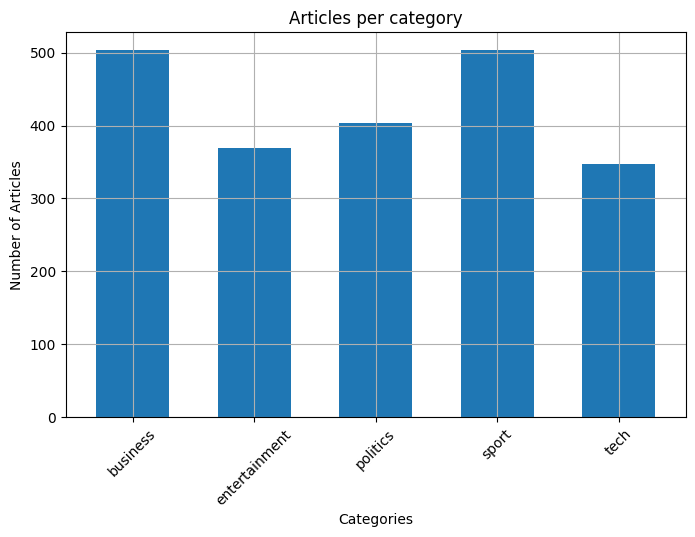

In [44]:
# Chart - 1 visualization code

# Plotting a bar graph to represent all the categories and number of articles in each 
ax = df.plot(x = "Category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        width = 0.6, title = 'Articles per category',
        rot = 45)

plt.show()

##### 1. Why did you pick the specific chart?

We picked the bar chart to check the distribution of articles in percentage through individual categories.

##### 2. What is/are the insight(s) found from the chart?

There are more articles in 'Sports' and 'business' categories and less articles in 'tech' and ' entertainment', whereas 'politics' category has average number of articles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we now know that BBC has more aricles in certain cateories whereas less number of articles in other categories.

#### Chart - 2

Observing the length of Articles.

We will plot a distribution plot to observe the frequency distribution of article lengths across our bbc_df dataframe.

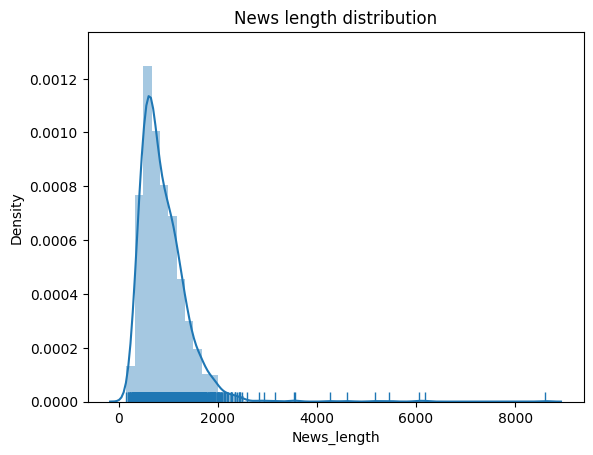

In [45]:
# Chart - 2 visualization code

plt.figure()
sns.distplot(bbc_df['News_length'],rug = True).set_title('News length distribution')
plt.show()

Most of the articles have lengths close to 1000-3000. However, some articles have word counts over 3000 as well. 

Let's check how many articles have such a higher lengths in our dataset.

In [49]:
print("Number of articles having length less than 1000: {}".format((bbc_df['News_length'] < 300).sum()))
print("Number of articles having length less than 3000: {}".format((bbc_df['News_length'] < 3000).sum()))
print("Number of articles having length greater than 3000: {}".format((bbc_df['News_length'] > 3000).sum()))

Number of articles having length less than 1000: 30
Number of articles having length less than 3000: 2115
Number of articles having length greater than 3000: 10


##### 1. Why did you pick the specific chart?

We chose a distplot to observe the distribution of article lengths across our dataset. 

##### 2. What is/are the insight(s) found from the chart?

We found that most of the articles have lengths of around 300 to 3000 characters. We will use a kdeplot to further explore the distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we now know that most of the articles have moderate lengths, and only a few articles have extremely low and high lengths.

#### Chart - 3

Distribution wrt categories

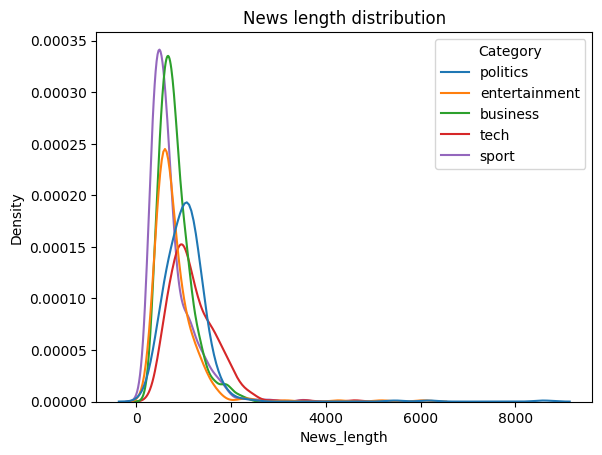

In [50]:
# Chart - 3 visualization code
plt.figure()
sns.kdeplot(x= bbc_df['News_length'],data = bbc_df, hue = 'Category').set_title('News length distribution')
plt.show()

##### 1. Why did you pick the specific chart?

To observe the approximate length distributions of each categories.

##### 2. What is/are the insight(s) found from the chart?

The categories with highest lengths in descending order is as follows:
1. Sport
2. Business
3. Entertainment
4. Politics
5. Tech

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We can observe that there is a distinct difference in the distribution of lengths of articles in different categories. Hence, this can be a strong  

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

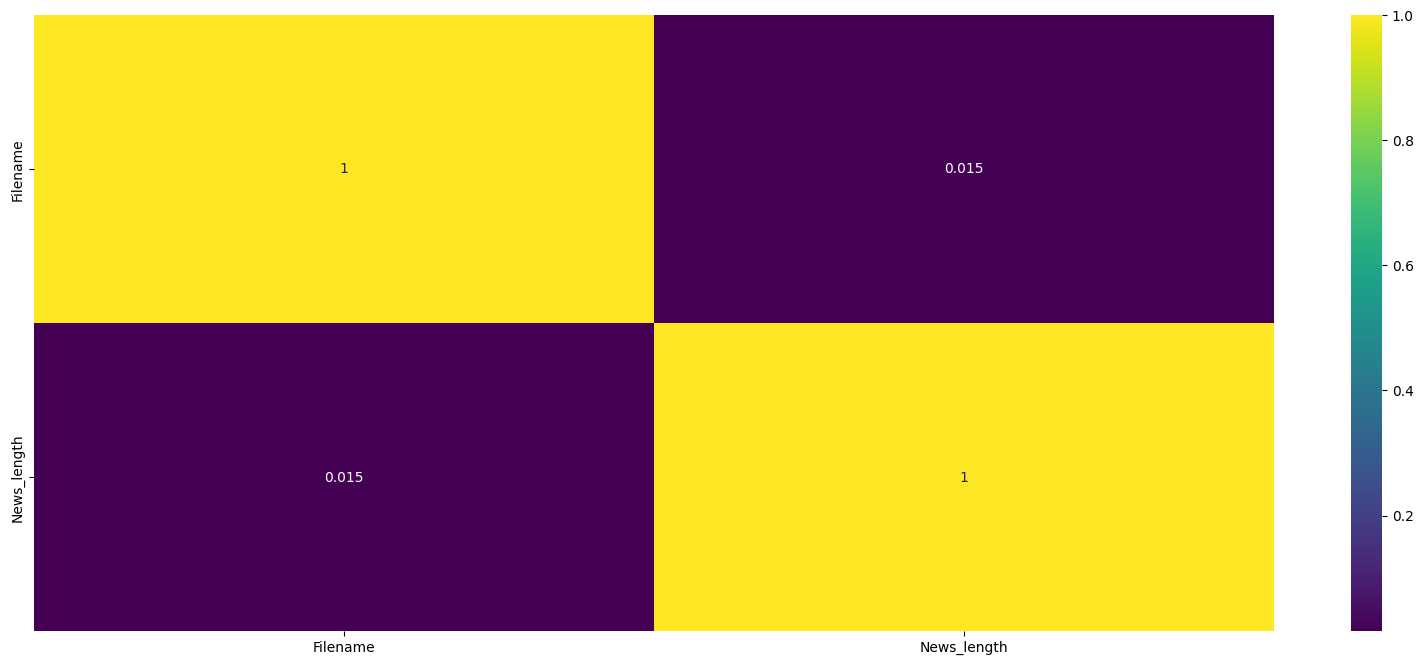

In [51]:
# Correlation Heatmap visualization code

# Checking for multi-collinearity
correlation = bbc_df.corr()

plt.figure(figsize=[20, 8])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [52]:
# Handling Missing Values & Missing Value Imputation

bbc_df.isnull().sum()

Filename       0
Contents       0
Category       0
News_length    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have used isnull() function to check if there are any missing values in the dataset.

As was verified during the initial data exploration and heatmap, there are no missing values in the dataset.

Hence, no operation is required to handle the missing values.

### 2. Handling Outliers

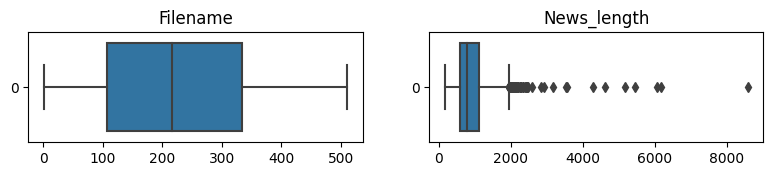

In [53]:
# Handling Outliers & Outlier treatments

# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in bbc_df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)
  
  # Create a box plot of the current column's data
  sns.boxplot(bbc_df[item], orient = 'h')
  
  # Add the column name to the subplot title
  plt.title(item)
  
  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

From the boxplot, we can observe that there are several outliers present in the 'News_length' feature. This informs us that the news length is majorly accumulated within 0 to 2000 characters, but there are also several news articles that have more than 2000 characters.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Although we can clearly see the occurances of outliers in our dataset, we will not remove these outliers due to the following reasons:

* We previously observed that there is evident distinction between the average values of 'News_length' feature for all categories. Hence, the varied distribution of news-length can provide as a strong determining factor for topic modeling.

* Outliers don't have much of an impact in topic modeling as the objective is to classify the articles into topics which doesn't involve much of news_length feature.

As we have observed, our dataset has got the complete set of articles. Now we can use this dataset to count the top words with highest frequencies using **CountVectorizer**.

### 3. Tokenization

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called Tokenization.

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called Feature Extraction (or Vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

Now that we know what CountVectorizer is, it's time we implement it to gather the top-most occuring words in out dataset.

In [54]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

We will use this function later after removing stop words.

### 4. Removing Stop Words

**Stop Words:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words.

To remove the stop words, we will be using a library in python called NLTK.

**NLTK(Natural Language Toolkit)** in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words.

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [55]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### 5. Implementing Count Vectorizer

Now lets implement our countvectorizer to extract top words with highest frequencies.

In [56]:
bbc_df.head()

,Filename,Contents,Category,News_length
0,296,open archer conservative party peer lord arche...,politics,655
1,239,stage charlie simpson new band fightstar stage...,entertainment,905
2,203,standoff deutsche lse bid deutsche boerse inve...,business,865
3,7,microsoft release bumper patch microsoft pc us...,tech,661
4,109,lufthansa fly profit german airline lufthansa ...,business,337


In [57]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [58]:
counts = count_vectorizer.fit_transform(bbc_df['Contents'])

In [59]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [60]:
# Shape of our sparse dataset
counts_df.shape

(2125, 18320)

In [61]:
counts_df.head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zonealarm,zoom,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let us count the number of occurances of all the terms/words used in all the articles.

We will follow the following steps to describe our most used words:

1. Create an empty dictionary
2. Storing the words as keys and the count as values
3. Updating our stopwords
4. Plotting the most frequent words using a bar-plot

In [62]:
# Creating an empty dictionary
counts_dict = {}


for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [63]:
# Looking at the most common words
# Sorting the occurance of each term in a descending order

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:20]

[('mr', 2792),
 ('year', 2187),
 ('new', 1768),
 ('people', 1241),
 ('time', 1201),
 ('game', 1191),
 ('world', 988),
 ('government', 973),
 ('film', 918),
 ('uk', 908),
 ('company', 886),
 ('bn', 857),
 ('firm', 772),
 ('market', 714),
 ('service', 709),
 ('music', 683),
 ('number', 682),
 ('labour', 674),
 ('bbc', 653),
 ('minister', 632)]

Text(0, 0.5, 'Terms')

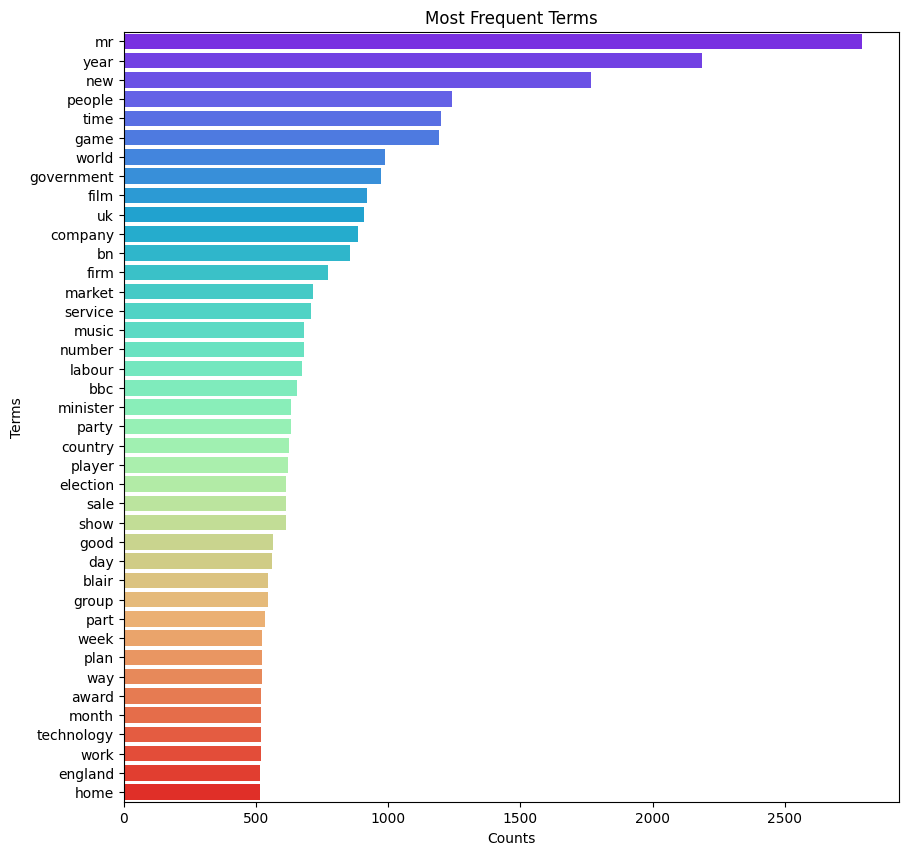

In [64]:
# Plotting a bar plot for the most frequent terms
top_words = [word for word, count in sorted_counts[:40]]
count_top_words = [count for word, count in sorted_counts[:40]]

plt.figure(figsize = (10,10))
sns.barplot(y = top_words, x=count_top_words, palette = 'rainbow')
plt.title("Most Frequent Terms")
plt.xlabel("Counts")
plt.ylabel("Terms")

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable.

However, we can also find a few words relevant to the categories of our articles. For example, 'UK' and 'US'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like 'government' could reflect in articles related to Politics, Business, Tech etc.

The words like 'film' and 'game' sounds relevant to the entertainment category.

### 6. Stemming & Lemmatization Test

**Stemming** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization**: This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or **lemma**. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [65]:
# Contents/Articles in our dataset
bbc_df['Contents']

0       open archer conservative party peer lord arche...
1       stage charlie simpson new band fightstar stage...
2       standoff deutsche lse bid deutsche boerse inve...
3       microsoft release bumper patch microsoft pc us...
4       lufthansa fly profit german airline lufthansa ...
                              ...                        
2120    firm bn russian oil firm yukos company role st...
2121    india iran gas bn bn natural gas iran firm nat...
2122    roxy music isle wight bill roxy music june isl...
2123    spike lee student director film maker spike le...
2124    trade gap rise uk trade gap european union nat...
Name: Contents, Length: 2125, dtype: object

For the process of lemmatization, we will use WordNetLemmatizer.

In [66]:
lemmatizer = WordNetLemmatizer()

First, Let us implement the lemmatizer on one of the articles to check it's operation.

In [70]:
# Lemmatizing an article to see what wordnet returns
for rows in bbc_df['Contents']:
 print(rows)
 print(len(rows))
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

open archer conservative party peer lord archer rank co chairman dr liam fox breakfast frost programme place vindictiveness politics lord archer year prison course justice deputy chairman year suspension party lord archer libel trial star high court london damage newspaper allegation involvement prostitute dr fox yes lord archer sure line people place politics prime minister alastair campbell tory peer lord tebbit dr fox view perjurer world senior conservative mp sir teddy taylor lord archer suppose sunday sinner doubt controversial lord archer available comment popular figure constituency tory party successful fundraiser house lord release prison
655
['open', 'archer', 'conservative', 'party', 'peer', 'lord', 'archer', 'rank', 'co', 'chairman', 'dr', 'liam', 'fox', 'breakfast', 'frost', 'programme', 'place', 'vindictiveness', 'politics', 'lord', 'archer', 'year', 'prison', 'course', 'justice', 'deputy', 'chairman', 'year', 'suspension', 'party', 'lord', 'archer', 'libel', 'trial', 'st

As we can see the lemmatizer seems to be working fine, the words are segregated into a list. 

##### Now, lets try the lemmatization using Snowball Lemmatizer.

In [71]:
# Snowball lemmatizer object
sno = nltk.stem.SnowballStemmer('english')

In [72]:
# Lemmatizing an article to see what snowball lemmatizer returns
for rows in bbc_df['Contents']:
 print(rows)
 print(len(rows))
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

open archer conservative party peer lord archer rank co chairman dr liam fox breakfast frost programme place vindictiveness politics lord archer year prison course justice deputy chairman year suspension party lord archer libel trial star high court london damage newspaper allegation involvement prostitute dr fox yes lord archer sure line people place politics prime minister alastair campbell tory peer lord tebbit dr fox view perjurer world senior conservative mp sir teddy taylor lord archer suppose sunday sinner doubt controversial lord archer available comment popular figure constituency tory party successful fundraiser house lord release prison
655
['open', 'archer', 'conserv', 'parti', 'peer', 'lord', 'archer', 'rank', 'co', 'chairman', 'dr', 'liam', 'fox', 'breakfast', 'frost', 'programm', 'place', 'vindict', 'polit', 'lord', 'archer', 'year', 'prison', 'cours', 'justic', 'deputi', 'chairman', 'year', 'suspens', 'parti', 'lord', 'archer', 'libel', 'trial', 'star', 'high', 'court',

Again the lemmatizer does its job and we got the list of words similar to WordNet Lemmatizer.

##### Now, let's check the same with textBlob

In [74]:
# Lemmatizing using textblob
for rows in bbc_df['Contents']:
 print(rows)
 print(len(rows))
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

open archer conservative party peer lord archer rank co chairman dr liam fox breakfast frost programme place vindictiveness politics lord archer year prison course justice deputy chairman year suspension party lord archer libel trial star high court london damage newspaper allegation involvement prostitute dr fox yes lord archer sure line people place politics prime minister alastair campbell tory peer lord tebbit dr fox view perjurer world senior conservative mp sir teddy taylor lord archer suppose sunday sinner doubt controversial lord archer available comment popular figure constituency tory party successful fundraiser house lord release prison
655
['open', 'archer', 'conservative', 'party', 'peer', 'lord', 'archer', 'rank', 'co', 'chairman', 'dr', 'liam', 'fox', 'breakfast', 'frost', 'programme', 'place', 'vindictiveness', 'politics', 'lord', 'archer', 'year', 'prison', 'course', 'justice', 'deputy', 'chairman', 'year', 'suspension', 'party', 'lord', 'archer', 'libel', 'trial', 'st

We can clearly observe that similar lemmatized output is obtained from textBlob as well.


##### All of the following lemmatizers are displaying same results:

1. WordNetLemmatizer
2. Snowball Lemmatizer
3. textBlob

And all of the above lemmatizer algorithms are performing well on our content feature.

### 7. Feature Extraction (Vectorization)

Vectorization is a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

Let us implement vectorization.

In [75]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [84]:
# Taking a sample Article
text_sample = bbc_df.Contents

In [85]:
print('Content before vectorization: {}'.format(text_sample[123]))

Content before vectorization: u economy show solid gdp growth u economy annual rate gross domestic product figure business capital equipment trade deficit gdp measure country economic health value good service new gdp figure commerce department friday growth rate economist friday announcement growth annual rate quarter year positive economic climate rise interest rate u rate rise march january march quarter economy annual rate economist final quarter business capital equipment software quarter consumer spending final quarter


In [86]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 2530)	1
  (0, 167)	7
  (0, 749)	2
  (0, 2611)	3
  (0, 2641)	2
  (0, 2139)	8
  (0, 2905)	1
  (0, 663)	1
  (0, 565)	2
  (0, 1075)	3
  (0, 2094)	1
  (0, 1413)	3
  (0, 422)	1
  (0, 1442)	1
  (0, 2830)	1
  (0, 2699)	2
  (0, 2727)	2
  (0, 3982)	2
  (0, 2804)	2
  (0, 825)	1
  (0, 1965)	1
  (0, 973)	1
  (0, 3521)	1
  (0, 3702)	1
  (0, 3404)	1
  :	:
  (2124, 1538)	3
  (2124, 3676)	3
  (2124, 1002)	1
  (2124, 1789)	1
  (2124, 1056)	1
  (2124, 1470)	2
  (2124, 591)	2
  (2124, 1223)	5
  (2124, 2570)	1
  (2124, 3257)	1
  (2124, 3015)	1
  (2124, 1773)	3
  (2124, 1179)	1
  (2124, 3757)	1
  (2124, 940)	3
  (2124, 1125)	1
  (2124, 3269)	1
  (2124, 3409)	2
  (2124, 1126)	1
  (2124, 3413)	1
  (2124, 3255)	1
  (2124, 3513)	1
  (2124, 2527)	1
  (2124, 775)	1
  (2124, 2517)	1


We can see that the text was succesfully converted into a vectorized numeric form. The countvectorizer works as intended, we can now proceed forward to implement the ML model.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***